In [1]:
library(dagitty)
library(lavaan)
library(readxl)
library(flowCore)
library(premessa)

Warning message:
"package 'dagitty' was built under R version 3.6.3"Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-8
lavaan is FREE software! Please report any bugs.
Warning message:
"package 'readxl' was built under R version 3.6.3"

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.


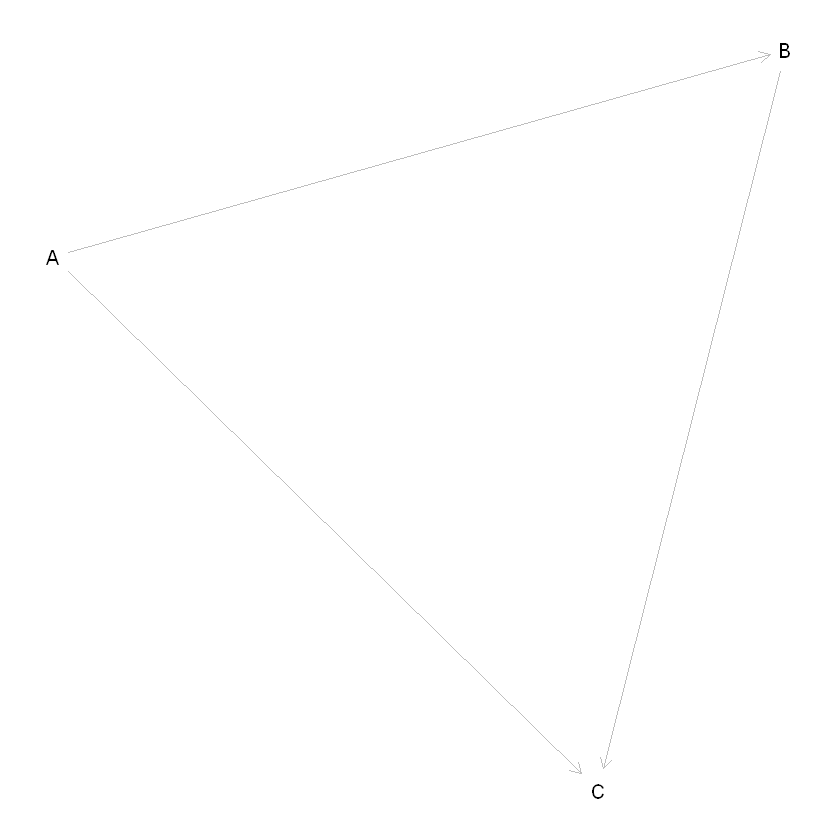

In [2]:
myDAG <- dagitty("dag {A -> B -> C A -> C}")
plot(myDAG)

In [3]:
myDAG <- dagitty( 'dag {
Age -> Irradiation
Age -> Menopause
Irradiation -> Recurrence
Menopause -> Recurrence
}' )

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.


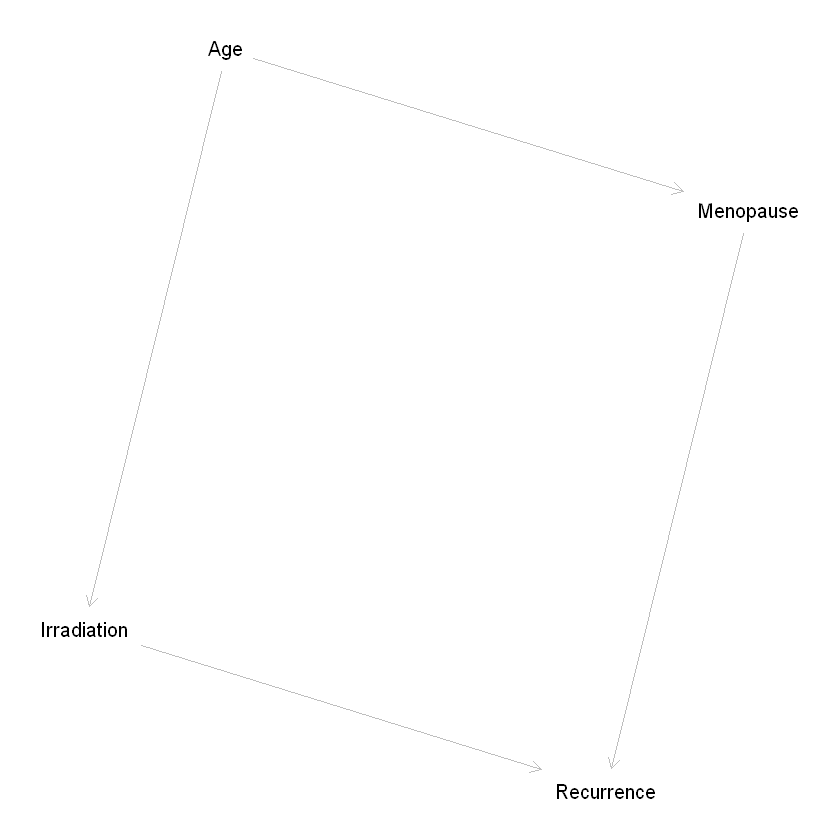

In [4]:
plot( myDAG )

In [5]:
data <- read.table( "brca.txt", header=TRUE )

In [6]:
impliedConditionalIndependencies( myDAG )

Age _||_ Rcrr | Irrd, Mnps
Irrd _||_ Mnps | Age

In [7]:
ciTest( "Age", "Recurrence", c( "Irradiation", "Menopause" ),
data, type= "cis.chisq" )
ciTest( "Irradiation", "Menopause", "Age", data, type="cis.chisq" )

,rmsea,x2,df,p.value,rmsea 2.5%,rmsea 97.5%
"Age _||_ Rcrr | Irrd, Mnps",0.3094734,104.1102,14,7.695273e-16,0.1637174,0.4827959


,rmsea,x2,df,p.value,rmsea 2.5%,rmsea 97.5%
Irrd _||_ Mnps | Age,0.02884549,2.692835,4,0.6104689,0,0.3073013


In [8]:
localTests( myDAG, data, type="cis.chisq" )

,rmsea,x2,df,p.value,rmsea 2.5%,rmsea 97.5%
"Age _||_ Rcrr | Irrd, Mnps",0.30947343,104.110174,14,7.695273e-16,0.1637174,0.4827959
Irrd _||_ Mnps | Age,0.02884549,2.692835,4,6.104689e-01,0.0000000,0.3073013


In [9]:
data <- read.csv( file="protein_signal.csv", header=TRUE )

In [10]:
model <- dagitty( 'dag {
bb="-0.5,-0.5,0.5,0.5"
P38 [pos="-0.155,-0.141"]
PIP2 [pos="-0.337,0.063"]
PIP3 [pos="-0.278,-0.068"]
PKA [pos="-0.127,-0.200"]
PKC [pos="-0.111,-0.287"]
Erk [pos="-0.061,-0.001"]
Akt [pos="-0.115,0.052"]
Jnk [pos="-0.208,-0.149"]
Plcg [pos="-0.337,-0.177"]
Mek [pos="-0.063,-0.096"]
Raf [pos="-0.066,-0.204"]
PIP2 -> PKC [pos="-0.485,-0.379"]
PIP3 -> PIP2
PIP3 -> Akt
PIP3 -> Plcg
PKA -> P38
PKA -> Erk
PKA -> Akt
PKA -> Jnk
PKA -> Mek
PKA -> Raf
PKC -> P38 [pos="-0.166,-0.227"]
PKC -> Jnk [pos="-0.188,-0.258"]
PKC -> Mek [pos="-0.021,-0.245"]
PKC -> Raf
Plcg -> PIP2
Plcg -> PKC [pos="-0.248,-0.271"]
Mek -> Erk
Raf -> Mek
}' )

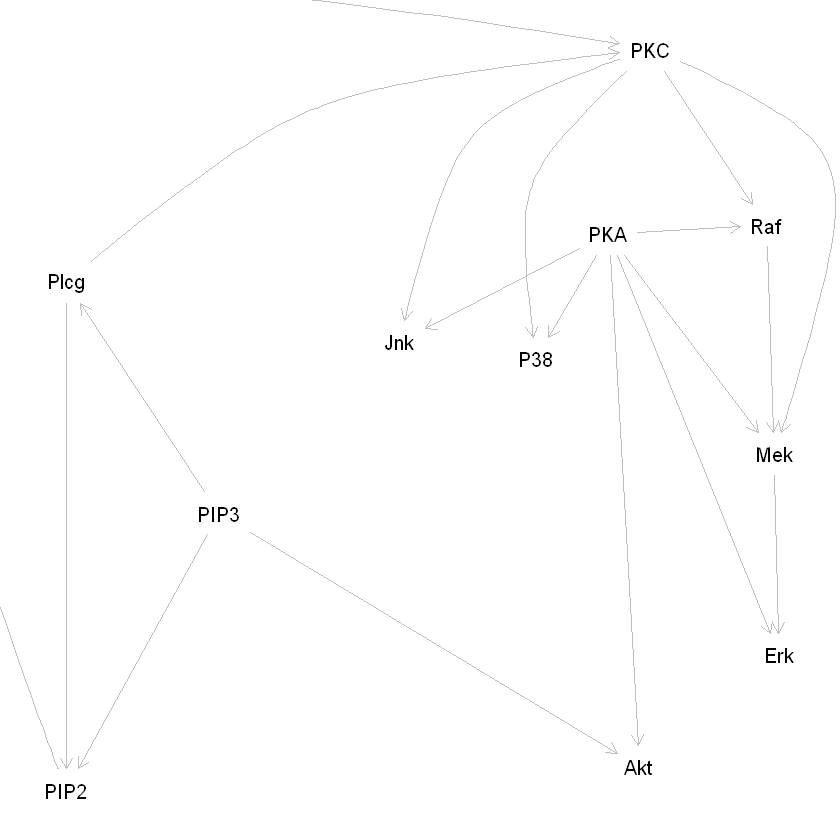

In [11]:
plot(model)

In [12]:
res <- localTests( x=model, data=data, type="cis" )
print( res )

                                    estimate       p.value         2.5%
Akt _||_ Erk | Mek, PKA         0.8970851604  0.000000e+00  0.963463790
Akt _||_ Erk | PKA, PKC         0.8976677512  0.000000e+00  0.964436850
Akt _||_ Erk | PIP2, PKA, Plcg  0.8969931314  0.000000e+00  0.963310055
Akt _||_ Erk | PIP3, PKA        0.8979297031  0.000000e+00  0.964875186
Akt _||_ Jnk | PKA, PKC        -0.0571097695  6.600962e-10 -0.075175525
Akt _||_ Jnk | PIP2, PKA, Plcg -0.0667608395  5.140573e-13 -0.084802677
Akt _||_ Jnk | PIP3, PKA       -0.0624895340  1.393854e-11 -0.080541934
Akt _||_ Mek | PKA, PKC         0.0648078273  2.383684e-12  0.046719287
Akt _||_ Mek | PIP2, PKA, Plcg  0.0603038930  6.970457e-11  0.042205815
Akt _||_ Mek | PIP3, PKA        0.0617998837  2.328828e-11  0.043705410
Akt _||_ P38 | PKA, PKC         0.2137041498 1.508917e-121  0.196341569
Akt _||_ P38 | PIP2, PKA, Plcg  0.1616372551  1.965115e-69  0.143919205
Akt _||_ P38 | PIP3, PKA        0.1655014964  9.050500e-73  0.14

In [13]:
res <- localTests( x=model, data=data,
max.conditioning.variables=2 )
print( res )

                                estimate       p.value         2.5%
Akt _||_ Erk | Mek, PKA     0.8970851604  0.000000e+00  0.963463790
Akt _||_ Erk | PKA, PKC     0.8976677512  0.000000e+00  0.964436850
Akt _||_ Erk | PIP3, PKA    0.8979297031  0.000000e+00  0.964875186
Akt _||_ Jnk | PKA, PKC    -0.0571097695  6.600962e-10 -0.075175525
Akt _||_ Jnk | PIP3, PKA   -0.0624895340  1.393854e-11 -0.080541934
Akt _||_ Mek | PKA, PKC     0.0648078273  2.383684e-12  0.046719287
Akt _||_ Mek | PIP3, PKA    0.0617998837  2.328828e-11  0.043705410
Akt _||_ P38 | PKA, PKC     0.2137041498 1.508917e-121  0.196341569
Akt _||_ P38 | PIP3, PKA    0.1655014964  9.050500e-73  0.147806559
Akt _||_ PIP2 | PIP3       -0.0136374356  1.407006e-01 -0.031772289
Akt _||_ PKC | PIP2, Plcg  -0.0034278992  7.111872e-01 -0.021570048
Akt _||_ PKC | PIP3        -0.0039815169  6.671376e-01 -0.022122632
Akt _||_ Plcg | PIP3       -0.0638592012  4.937006e-12 -0.081907264
Akt _||_ Raf | PKA, PKC    -0.0235946248  1.0802

In [14]:
res <- res[order( abs( res$estimate ) ),]

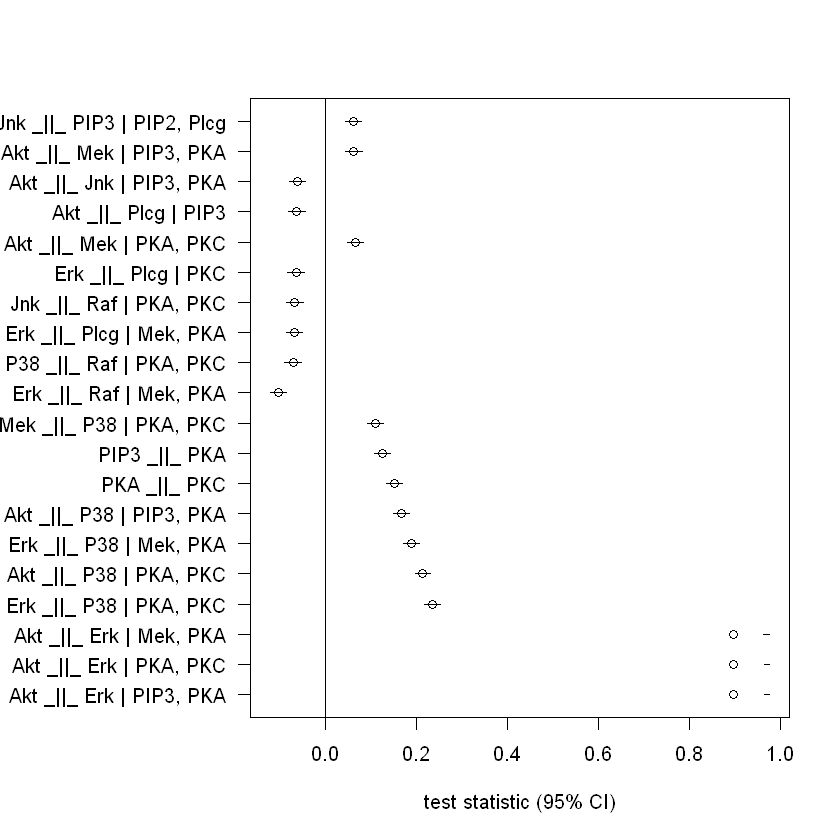

In [15]:
plotLocalTestResults( tail( res, 20) )

In [16]:
# X <- rlnorm( 500 )
# par( font.main=1, cex.main=1, bty='l',
# mfrow=c( 1, 2 ), pch=19, mar=c( 4, 4, 2, 1 ) )
# qqnorm( X, main="Before log transformation", cex=.5 )
# qqnorm( log( X ), main="After log transformation", cex=.5 )

In [17]:
# dataset <- as.matrix( read_excel( "cd3cd28.xls" ) )
# d_flow <- as_flowFrame( dataset )
# lgcl <- estimateLogicle( d_flow,
# channels=colnames( d_flow))
# d_trans <- exprs( transform( d_flow, lgcl ) )
# par( font.main=1, cex.main=1, bty="l",
# mfrow=c( 1, 2 ), pch=19, mar=c( 4, 4, 2, 1 ) )
# qqnorm( dataset[, 4], main="Before logicle transformation", cex=.5 )
# qqnorm( d_trans[, 4], main="After logicle transformation", cex=.5 )

In [18]:
# localTests( myDAG, data, type="cis.loess",
# R=100, max.conditioning.variables=4 )

In [19]:
data <- read.csv( "adult.csv" )

In [20]:
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,Never-married,White,Male,40,no,<=50K
50-65,Academic-Degree,Is-Married,White,Male,<20,no,<=50K
35-49,HS-grad,Was-Married,White,Male,40,no,<=50K
50-65,Non-HS-Grad,Is-Married,Non-White,Male,40,no,<=50K
20-34,Academic-Degree,Is-Married,Non-White,Female,40,yes,<=50K
35-49,Academic-Degree,Is-Married,White,Female,40,no,<=50K


In [21]:
data$Age <- ordered( data$Age,
levels=c( "<20", "20-34", "35-49", "50-65", ">65" ) )
data$Education <- ordered(data$Education,
levels=c( "Non-HS-Grad", "HS-grad",
"College-Associate", "Academic-Degree" ) )
data$HoursPerWeek <- ordered( data$HoursPerWeek,
levels=c( "<20", "20-39", "40", ">40" ) )
data$Income <- ordered(data$Income,
levels=c( "<=50K", ">50K" ) )

In [22]:
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,Never-married,White,Male,40,no,<=50K
50-65,Academic-Degree,Is-Married,White,Male,<20,no,<=50K
35-49,HS-grad,Was-Married,White,Male,40,no,<=50K
50-65,Non-HS-Grad,Is-Married,Non-White,Male,40,no,<=50K
20-34,Academic-Degree,Is-Married,Non-White,Female,40,yes,<=50K
35-49,Academic-Degree,Is-Married,White,Female,40,no,<=50K


In [23]:
data$Race <- as.integer( data$Race )
data$Sex <- as.integer( data$Sex )
data$Immigrant <- as.integer( data$Immigrant )

In [24]:
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,Never-married,2,2,40,1,<=50K
50-65,Academic-Degree,Is-Married,2,2,<20,1,<=50K
35-49,HS-grad,Was-Married,2,2,40,1,<=50K
50-65,Non-HS-Grad,Is-Married,1,2,40,1,<=50K
20-34,Academic-Degree,Is-Married,1,1,40,2,<=50K
35-49,Academic-Degree,Is-Married,2,1,40,1,<=50K


In [25]:
levels(data$MaritalStatus) <- list(
Married="Is-Married",
NotMarried=c( "Was-Married", "Never-married" ) )

In [26]:
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,NotMarried,2,2,40,1,<=50K
50-65,Academic-Degree,Married,2,2,<20,1,<=50K
35-49,HS-grad,NotMarried,2,2,40,1,<=50K
50-65,Non-HS-Grad,Married,1,2,40,1,<=50K
20-34,Academic-Degree,Married,1,1,40,2,<=50K
35-49,Academic-Degree,Married,2,1,40,1,<=50K


In [27]:
data$MaritalStatus <- as.integer( data$MaritalStatus )

In [28]:
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,2,2,2,40,1,<=50K
50-65,Academic-Degree,1,2,2,<20,1,<=50K
35-49,HS-grad,2,2,2,40,1,<=50K
50-65,Non-HS-Grad,1,1,2,40,1,<=50K
20-34,Academic-Degree,1,1,1,40,2,<=50K
35-49,Academic-Degree,1,2,1,40,1,<=50K


In [29]:
corr <- lavCor( data )

In [30]:
corr

,Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
Age,1.00000000,0.084321379,-0.31736534,0.02356824,0.086984738,0.14034588,-0.013766498,0.35164879
Education,0.08432138,1.000000000,-0.07467899,0.05443497,0.001153065,0.19738384,-0.088518287,0.46504760
MaritalStatus,-0.31736534,-0.074678991,1.00000000,-0.09707553,-0.426348288,-0.25981461,-0.030453015,-0.55990128
Race,0.02356824,0.054434972,-0.09707553,1.00000000,0.105148399,0.08816635,-0.192114623,0.12741911
Sex,0.08698474,0.001153065,-0.42634829,0.10514840,1.000000000,0.27904865,0.003005682,0.32034302
HoursPerWeek,0.14034588,0.197383839,-0.25981461,0.08816635,0.279048646,1.00000000,-0.028055483,0.39574713
Immigrant,-0.01376650,-0.088518287,-0.03045302,-0.19211462,0.003005682,-0.02805548,1.000000000,-0.05828284
Income,0.35164879,0.465047602,-0.55990128,0.12741911,0.320343017,0.39574713,-0.058282845,1.00000000


In [31]:
model <- dagitty( 'dag {
bb="-4.6,-3.8,3.7,3.7"
Age [pos="-2,-2.6"]
Education [pos="1.4,0.5"]
HoursPerWeek [pos="-0.6,-0.1"]
Immigrant [pos="1.1,-2.6"]
Income [pos="-1.6,2.7"]
MaritalStatus [pos="-3.7,-2.6"]
Race [pos="3.0,-2.5"]
Sex [pos="-0.5,-2.6"]
Age -> { Education HoursPerWeek Income MaritalStatus }
Education -> Income
HoursPerWeek -> Income
Immigrant -> { Education HoursPerWeek }
Immigrant <-> Race
MaritalStatus -> Income
Race -> Education
Sex -> { Education HoursPerWeek }
}' )

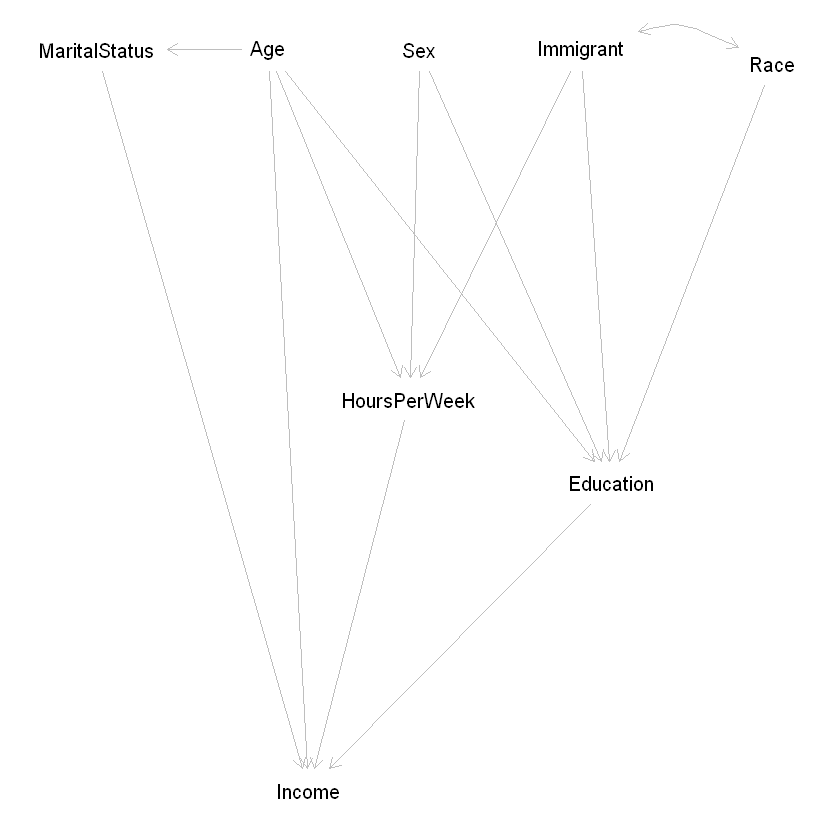

In [32]:
plot(model)

In [33]:
localTests( model, sample.cov=corr, sample.nobs=nrow( data ) )

,estimate,p.value,2.5%,97.5%
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
"Edct _||_ HrPW | Age, Immg, Sex",0.195438303,4.833065e-259,0.184573763,0.206294661
Edct _||_ MrtS | Age,-0.050711171,1.206584e-18,-0.061961468,-0.039448057
HrPW _||_ MrtS | Age,-0.229278589,0.000000e+00,-0.239997517,-0.218592229
HrPW _||_ Race | Immg,0.084380882,7.631673e-49,0.073164999,0.095576096
"Immg _||_ Incm | Age, Edct, HrPW",-0.015910400,5.724627e-03,-0.027191590,-0.004625160
Immg _||_ MrtS,-0.030453015,1.221746e-07,-0.041724194,-0.019174096
Immg _||_ Sex,0.003005682,6.016852e-01,-0.008280109,0.014290707


In [34]:
localTests( x=model, sample.cov=corr,
sample.nobs=nrow( data ),
max.conditioning.variables=2 )

,estimate,p.value,2.5%,97.5%
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
Edct _||_ MrtS | Age,-0.050711171,1.206584e-18,-0.061961468,-0.039448057
HrPW _||_ MrtS | Age,-0.229278589,0.000000e+00,-0.239997517,-0.218592229
HrPW _||_ Race | Immg,0.084380882,7.631673e-49,0.073164999,0.095576096
Immg _||_ MrtS,-0.030453015,1.221746e-07,-0.041724194,-0.019174096
Immg _||_ Sex,0.003005682,6.016852e-01,-0.008280109,0.014290707
MrtS _||_ Race,-0.097075533,3.687141e-64,-0.108243453,-0.085884426
MrtS _||_ Sex,-0.426348288,0.000000e+00,-0.436663708,-0.417969404


In [35]:
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,2,2,2,40,1,<=50K
50-65,Academic-Degree,1,2,2,<20,1,<=50K
35-49,HS-grad,2,2,2,40,1,<=50K
50-65,Non-HS-Grad,1,1,2,40,1,<=50K
20-34,Academic-Degree,1,1,1,40,2,<=50K
35-49,Academic-Degree,1,2,1,40,1,<=50K


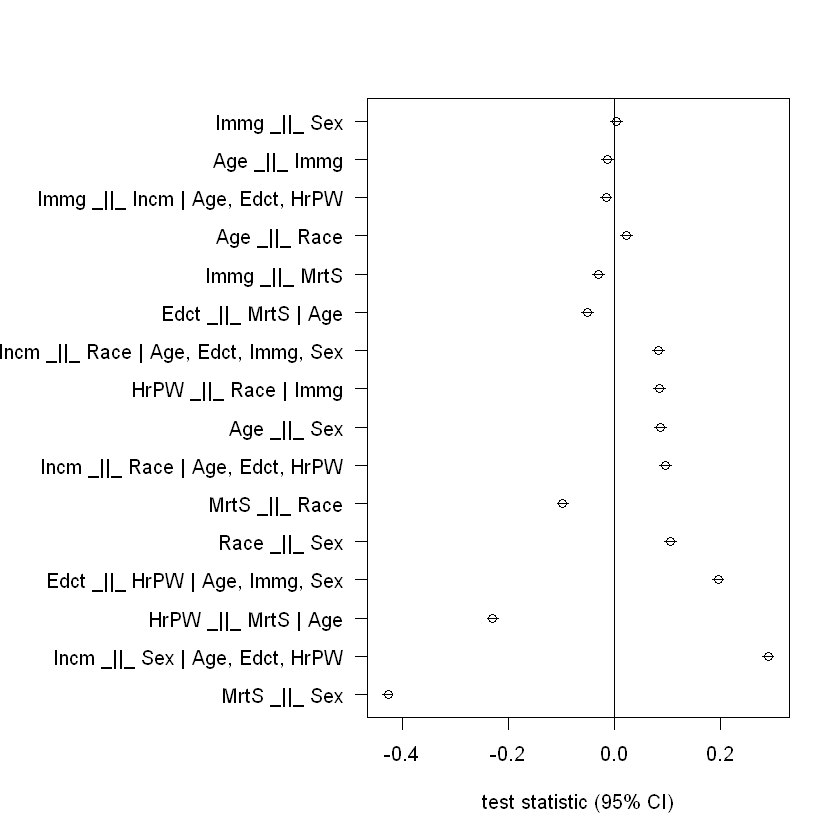

In [36]:
plotLocalTestResults( localTests( model,
sample.cov=corr, sample.nobs=nrow( data ) ) )

In [37]:
model <- dagitty( 'dag {
bb="-4.6,-3.8,3.7,3.7"
Age [pos="-2,-2.6"]
Education [pos="1.4,0.5"]
HoursPerWeek [pos="-0.6,-0.1"]
Immigrant [pos="1.1,-2.6"]
Income [pos="-1.6,2.7"]
MaritalStatus [pos="-3.7,-2.6"]
Race [pos="3.0,-2.5"]
Sex [pos="-0.5,-2.6"]
Age -> { Income MaritalStatus }
Education -> Income
HoursPerWeek -> Income
Immigrant -> { Education }
Immigrant <-> Race
MaritalStatus -> Income
Race -> Education
Sex -> { Education }
}' )

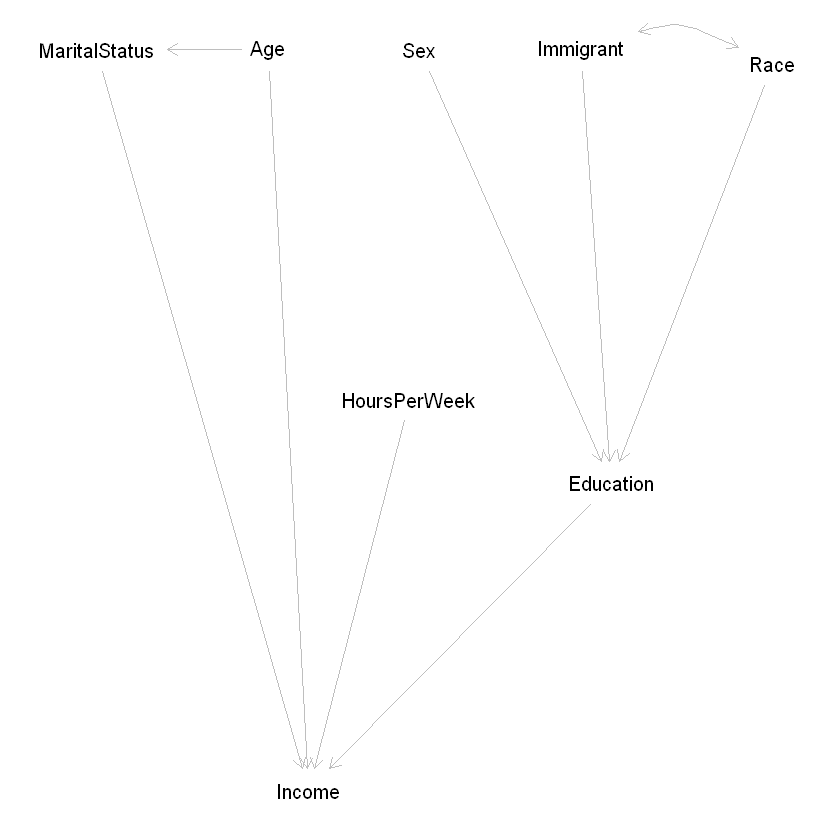

In [38]:
plot(model)

In [39]:
localTests( model, sample.cov=corr, sample.nobs=nrow( data ) )

,estimate,p.value,2.5%,97.5%
Age _||_ Edct,0.084321379,8.866104e-49,0.073105576,0.095516526
Age _||_ HrPW,0.140345881,6.269761e-133,0.129267531,0.151396949
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
Edct _||_ HrPW,0.197383839,2.398037e-264,0.186529032,0.208232033
Edct _||_ MrtS,-0.074678991,1.337122e-38,-0.085892424,-0.063447022
HrPW _||_ Immg,-0.028055483,1.096430e-06,-0.039328547,-0.016775285
HrPW _||_ MrtS,-0.259814609,0.000000e+00,-0.270406271,-0.249325527
HrPW _||_ Race,0.088166348,3.480544e-53,0.076957592,0.099353649


In [40]:
localTests( x=model, sample.cov=corr,
sample.nobs=nrow( data ),
max.conditioning.variables=2 )

,estimate,p.value,2.5%,97.5%
Age _||_ Edct,0.084321379,8.866104e-49,0.073105576,0.095516526
Age _||_ HrPW,0.140345881,6.269761e-133,0.129267531,0.151396949
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
Edct _||_ HrPW,0.197383839,2.398037e-264,0.186529032,0.208232033
Edct _||_ MrtS,-0.074678991,1.337122e-38,-0.085892424,-0.063447022
HrPW _||_ Immg,-0.028055483,1.096430e-06,-0.039328547,-0.016775285
HrPW _||_ MrtS,-0.259814609,0.000000e+00,-0.270406271,-0.249325527
HrPW _||_ Race,0.088166348,3.480544e-53,0.076957592,0.099353649


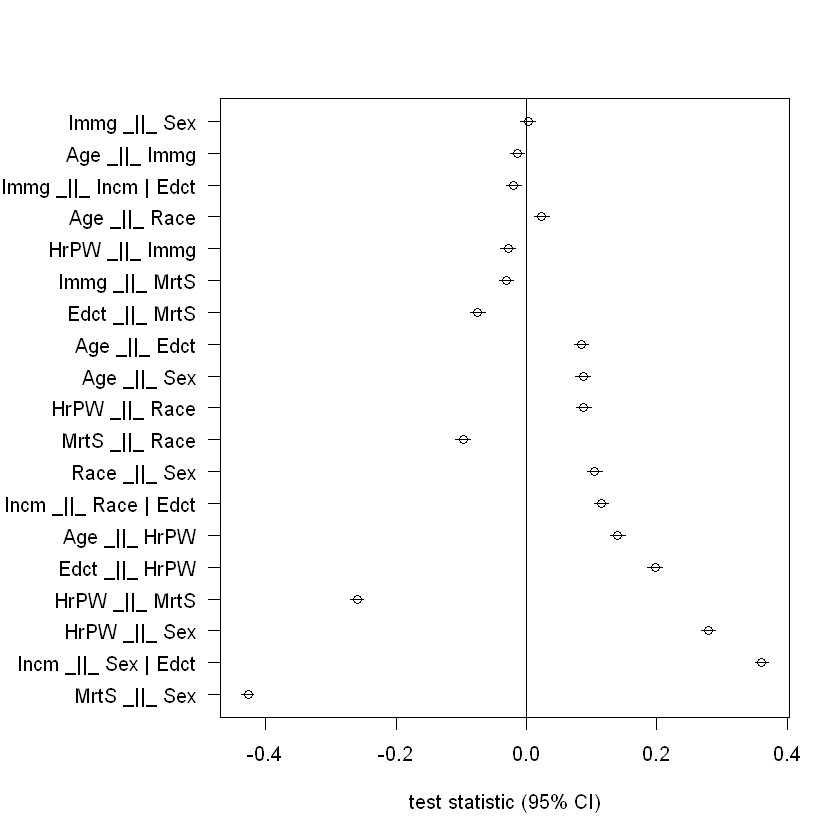

In [41]:
plotLocalTestResults( localTests( model,
sample.cov=corr, sample.nobs=nrow( data ) ) )

In [42]:
data

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,2,2,2,40,1,<=50K
50-65,Academic-Degree,1,2,2,<20,1,<=50K
35-49,HS-grad,2,2,2,40,1,<=50K
50-65,Non-HS-Grad,1,1,2,40,1,<=50K
20-34,Academic-Degree,1,1,1,40,2,<=50K
35-49,Academic-Degree,1,2,1,40,1,<=50K
35-49,Non-HS-Grad,1,1,1,<20,2,<=50K
50-65,HS-grad,1,2,2,>40,1,>50K
20-34,Academic-Degree,2,2,1,>40,1,>50K
35-49,Academic-Degree,1,2,2,40,1,>50K
